In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=True)

Reading /data/hu_kamm/eeg_llm/sep_uwgr_prepro.fdt
Reading 0 ... 3363544  =      0.000 ...  1642.355 secs...


/tmp/ipykernel_611222/909834248.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=True)


In [6]:
events, event_id = mne.events_from_annotations(raw)

tmin = -0.05
tmax = 0.22

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)

Used Annotations descriptions: [np.str_('1')]
Not setting metadata
6038 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6038 events and 554 original time points ...
0 bad epochs dropped


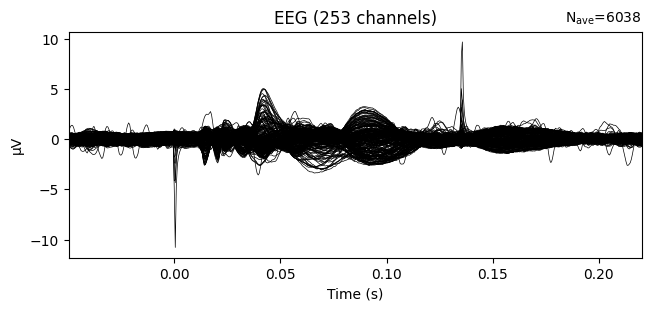

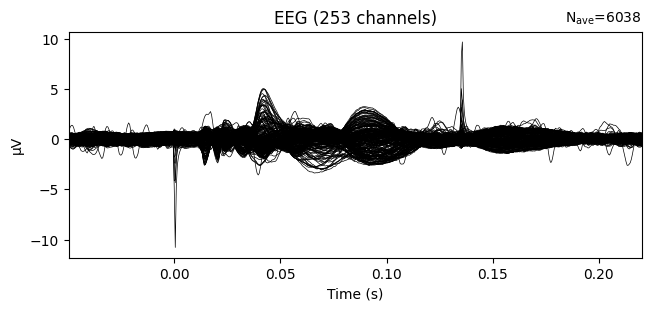

In [11]:
erp = epochs.average()
erp.plot()

In [31]:
times = erp.times
avg_data = erp.data
ch_names = erp.ch_names 

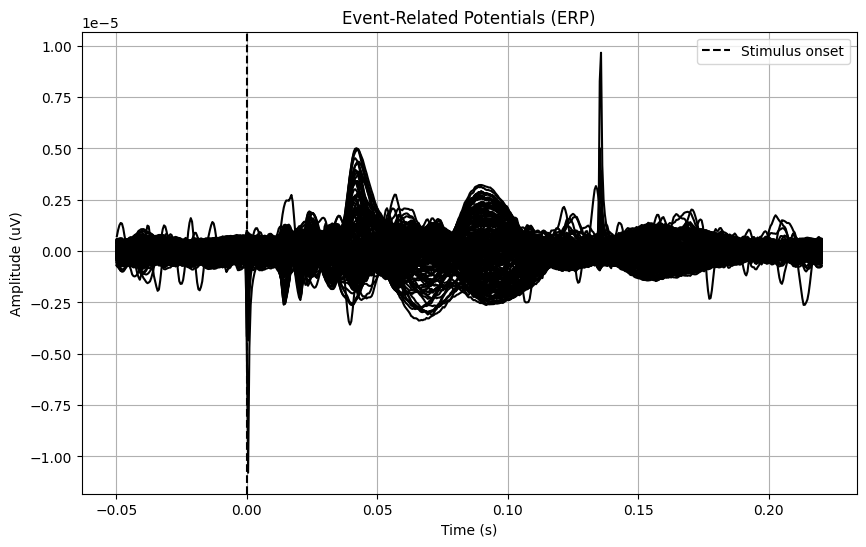

In [32]:
plt.figure(figsize=(10, 6))
for i, ch_name in enumerate(ch_names):
    plt.plot(times, avg_data[i], color='k')
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus onset')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Event-Related Potentials (ERP)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [33]:
data = epochs.get_data()

/tmp/ipykernel_611222/2927246647.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [85]:
mgfp = np.sqrt(np.var(data, axis=1))

In [87]:
mean_mgfp = np.mean(mgfp, axis=0)
std_deviation = np.var(mgfp, axis=0)


In [98]:
def moving_avg(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='valid')

window_size = 1
smoothed_mgfp = moving_avg(mean_mgfp, window_size)
smoothed_std_deviation = moving_avg(std_deviation, window_size)
smoothed_times = times[:len(smoothed_mgfp)]

In [99]:
test = smoothed_mgfp - smoothed_std_deviation

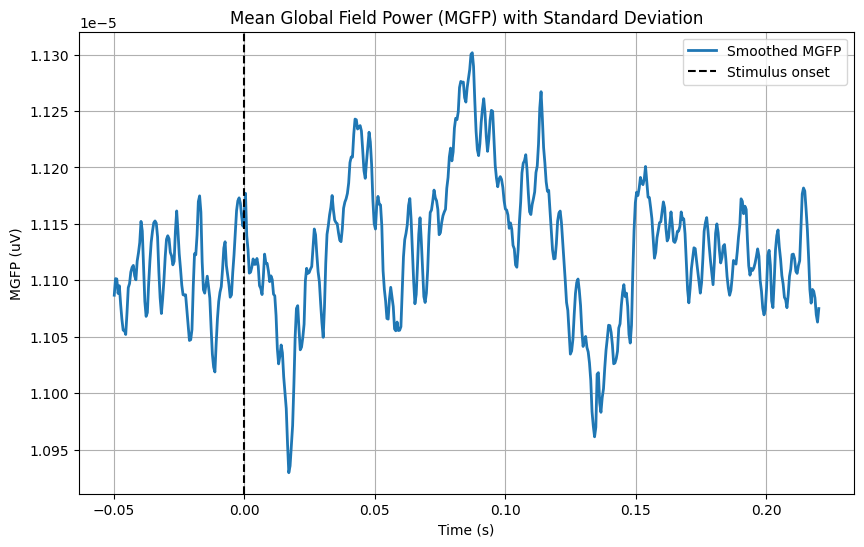

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(smoothed_times, smoothed_mgfp, label='Smoothed MGFP', linewidth=2)
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus onset')
plt.xlabel('Time (s)')
plt.ylabel('MGFP (uV)')
plt.title('Mean Global Field Power (MGFP) with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

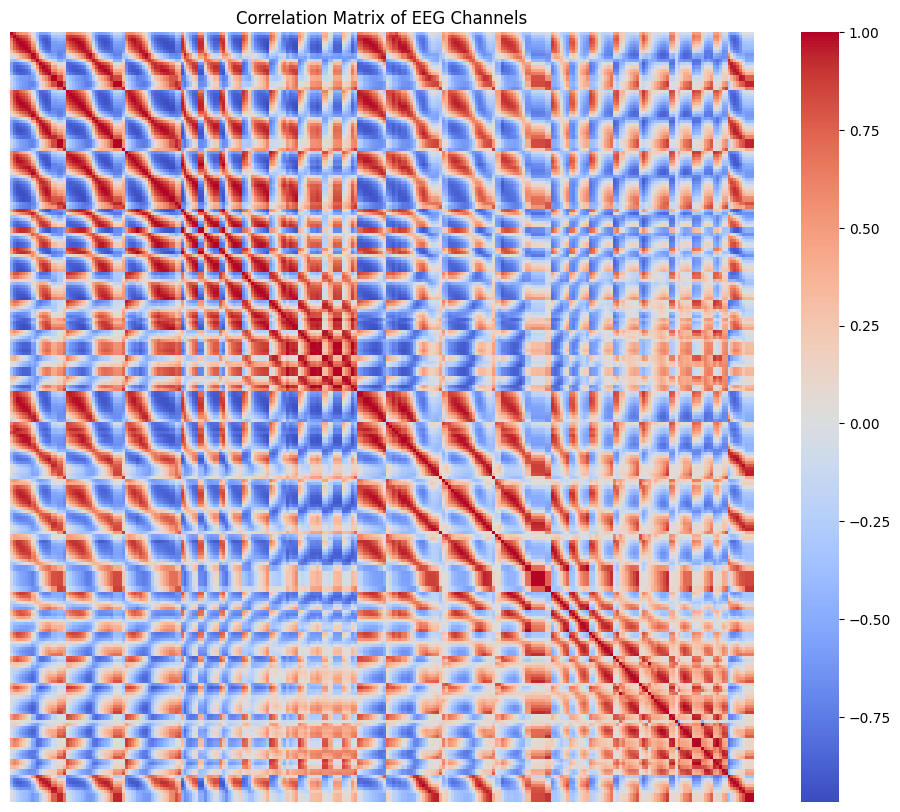

In [117]:
corr_martix = np.corrcoef(data)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_martix, xticklabels=False, yticklabels=False,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of EEG Channels')
plt.show()

In [121]:
ch_names = epochs.info['ch_names']
print(ch_names)

['Z1L', 'Z2L', 'Z3L', 'Z4L', 'Z5L', 'Z6L', 'Z7L', 'Z8L', 'Z9L', 'Z10L', 'Z11L', 'Z12L', 'Z13L', 'Z14L', 'Z15L', 'Z16L', 'Z17L', 'Z18L', 'Z19L', 'L1Z', 'L2Z', 'L3Z', 'L4Z', 'L5Z', 'L6Z', 'L7Z', 'L8Z', 'L9Z', 'L10Z', 'L11Z', 'L12Z', 'L13Z', 'L14Z', 'L15Z', 'L16Z', 'L17Z', 'L18Z', 'L19Z', 'L20Z', 'L1L', 'L2L', 'L3L', 'L4L', 'L5L', 'L6L', 'L7L', 'L8L', 'L9L', 'L10L', 'L11L', 'L12L', 'L13L', 'L14L', 'L15L', 'L16L', 'L17L', 'L18L', 'L19L', 'L1A', 'L2A', 'L3A', 'L4A', 'L5A', 'L6A', 'L1B', 'L2B', 'L3B', 'L4B', 'L5B', 'L6B', 'L7B', 'L1C', 'L2C', 'L3C', 'L4C', 'L5C', 'L6C', 'L7C', 'L8C', 'L1D', 'L2D', 'L3D', 'L4D', 'L5D', 'L6D', 'L7D', 'L8D', 'L9D', 'L1E', 'L2E', 'L3E', 'L4E', 'L5E', 'L6E', 'L7E', 'L8E', 'L9E', 'L10E', 'L1F', 'L2F', 'L3F', 'L4F', 'L5F', 'L6F', 'L7F', 'L8F', 'L1G', 'L2G', 'L3G', 'L4G', 'L5G', 'L6G', 'L7G', 'L1H', 'L2H', 'L3H', 'L4H', 'L5H', 'Z1Z', 'Z2Z', 'Z3Z', 'Z4Z', 'Z5Z', 'Z6Z', 'Z7Z', 'Z8Z', 'Z9Z', 'Z10Z', 'Z1R', 'Z2R', 'Z3R', 'Z4R', 'Z5R', 'Z6R', 'Z7R', 'Z8R', 'Z9R', 'Z10R',

In [115]:
data.shape

(253, 554)

/tmp/ipykernel_611222/644759894.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_epochs, n_channels, n_times = epochs.get_data().shape
/tmp/ipykernel_611222/644759894.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_reshaped = epochs.get_data().reshape(n_epochs, n_channels * n_times)


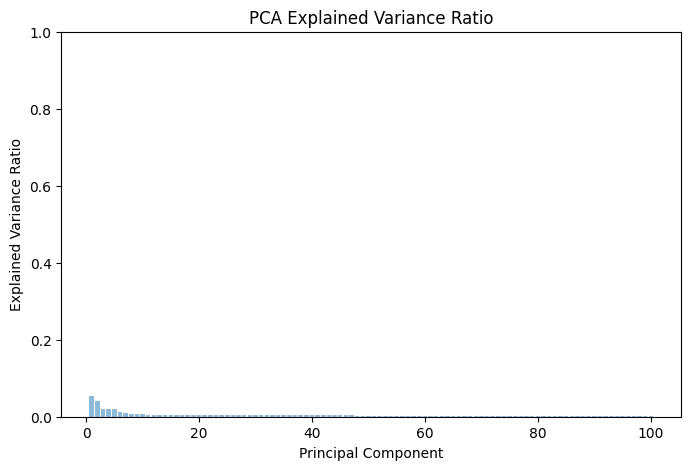

In [110]:
# Reshape the data for PCA (samples, features)
n_epochs, n_channels, n_times = epochs.get_data().shape
data_reshaped = epochs.get_data().reshape(n_epochs, n_channels * n_times)

# Apply PCA
pca = PCA(n_components=100)
pca_data = pca.fit_transform(data_reshaped)

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, 101), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.ylim(0,1)
plt.show()